## LSTM

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
file_path = 'C:/Users/beher/Downloads/apple_share_price.csv'
stock_data = pd.read_csv(file_path)
stock_data['average_price'] = stock_data[['High', 'Low', 'Close']].mean(axis=1)
time_series_data = stock_data[['Date', 'average_price']]
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
time_series_data.set_index('Date', inplace=True)
time_series_data.fillna(method='ffill', inplace=True)

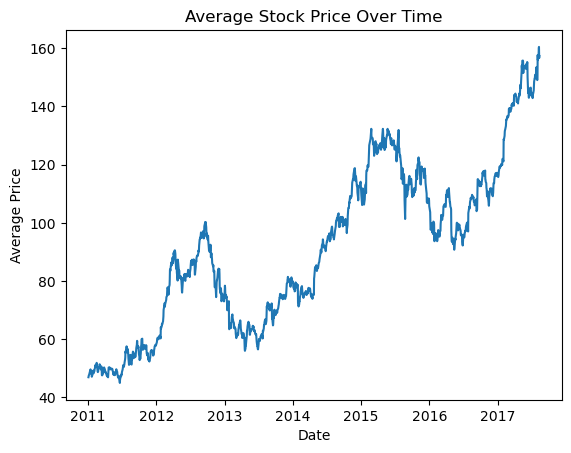

In [11]:
sns.lineplot(data=time_series_data, x='Date', y='average_price')
plt.ylabel('Average Price')
plt.title('Average Stock Price Over Time')
plt.show()

In [3]:
monthly_avg_data = time_series_data.resample('M').mean()
filter_start_date = "2014-01-02"
filter_end_date = "2017-08-11"
date_filter = (time_series_data.index >= filter_start_date) & (time_series_data.index <= filter_end_date)
filtered_time_series = time_series_data[date_filter]
monthly_filtered_data = filtered_time_series.resample('M').mean()

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(monthly_filtered_data)

In [7]:
def create_sequences(data, time_steps=1):
    sequences = []
    labels = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        labels.append(data[i + time_steps])
    return np.array(sequences), np.array(labels)

time_steps = 3
X, y = create_sequences(scaled_data, time_steps)

In [8]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.0059 - val_loss: 0.0077
Epoch 2/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0092 - val_loss: 0.0072
Epoch 3/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0119 - val_loss: 0.0073
Epoch 4/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0092 - val_loss: 0.0078
Epoch 5/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0089 - val_loss: 0.0081
Epoch 6/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0100 - val_loss: 0.0085
Epoch 7/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0116 - val_loss: 0.0083
Epoch 8/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0108 - val_loss: 0.0084
Epoch 9/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0093 - val_loss: 0.0080
Epoch 10/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 11/

In [21]:
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)


1/1 [==============================] - 0s 17ms/step


In [22]:
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
print(f'MAE: {mae}, RMSE: {rmse}')


MAE: 9.724768749775231, RMSE: 11.001272095236313


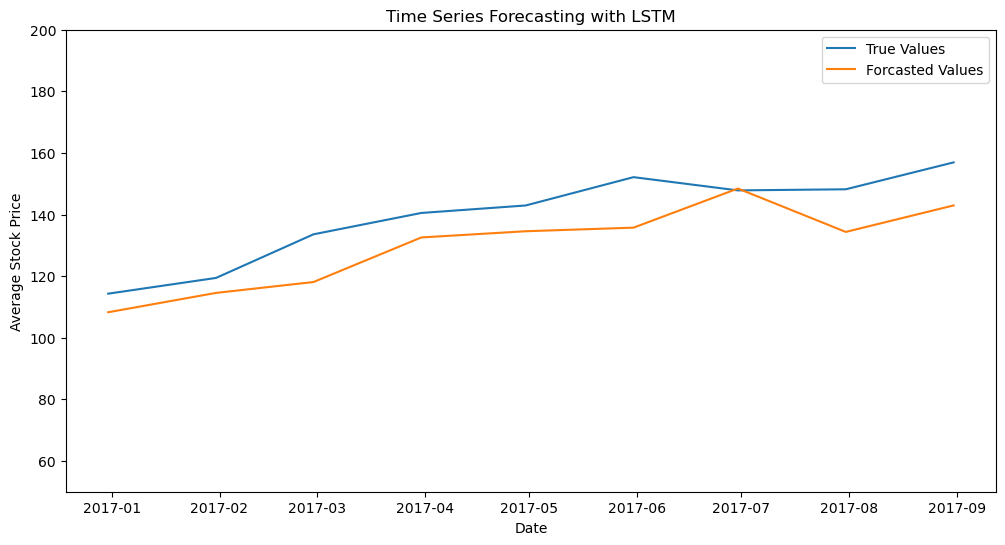

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_filtered_data.index[-len(y_test):], y_test_inv, label='True Values')
plt.plot(monthly_filtered_data.index[-len(y_test):], y_pred_inv, label='Forcasted Values')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.ylim(50,200)
plt.title('Time Series Forecasting with LSTM')
plt.legend()
plt.show()

### Since the Root Mean Squared Error and Mean Absolute Error of the LSTM model is lesser than SARIMA model so LSTM model works better towards forecasting stock prices.